# Active contour model

### Dr. Tirthajyoti Sarkar, Fremont CA 94536

The active contour model is a method to fit open or closed splines to lines or edges in an image. It works by **minimizing an energy that is in part defined by the image and part by the spline’s shape: length and smoothness**. The minimization is done implicitly in the shape energy and explicitly in the image energy.

In the following two examples, the active contour model is used 
1. to segment the face of a person from the rest of an image by fitting a closed curve to the edges of the face and 
2. to find the darkest curve between two fixed points while obeying smoothness considerations. 

Typically it is a good idea to smooth images a bit before analyzing, as done in the following examples.

We initialize a circle around the astronaut’s face and use the default boundary condition `bc='periodic'` to fit a closed curve. The default parameters `w_line=0`, `w_edge=1` will make the curve search towards edges, such as the boundaries of the face.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour

### Load the test image

In [2]:
img = data.astronaut()
img = rgb2gray(img)

### Data for creating circular boundary

In [3]:
s = np.linspace(0, 2*np.pi, 400)
x = 220 + 100*np.cos(s)
y = 100 + 100*np.sin(s)
init = np.array([x, y]).T

### Contour (after applying `gaussian` smoothing)

In [4]:
cntr = active_contour(gaussian(img, 3),init, alpha=0.015, beta=10, gamma=0.001)

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.
  """Entry point for launching an IPython kernel.


(0.0, 512.0, 512.0, 0.0)

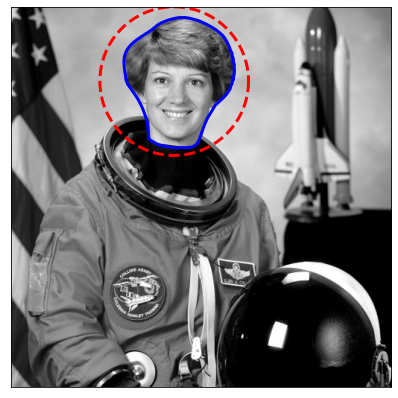

In [5]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)
# Circular boundary
ax.plot(init[:, 0], init[:, 1], '--r', lw=3)
# Detected contour
ax.plot(cntr[:, 0], cntr[:, 1], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

### Text data image

Here we initialize a straight line between two points, (5, 136) and (424, 50), and require that the spline has its end points there by giving the boundary condition `bc=’fixed’`. We furthermore make the algorithm search for dark lines by giving a negative `w_line` value.

In [6]:
img = data.text()

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The keyword argument `bc` to `active_contour` has been renamed. Use `boundary_condition=` instead. `bc` will be removed in scikit-image v0.18.
  
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.
  


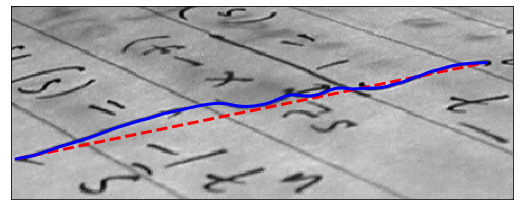

In [7]:
x = np.linspace(5, 424, 100)
y = np.linspace(136, 50, 100)
init = np.array([x, y]).T

cntr = active_contour(gaussian(img, 1), init, bc='fixed',
                       alpha=0.1, beta=1.0, w_line=-5, w_edge=0, gamma=0.1)

fig, ax = plt.subplots(figsize=(9, 5))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 0], init[:, 1], '--r', lw=3)
ax.plot(cntr[:, 0], cntr[:, 1], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

plt.show()